In [63]:
import pandas as pd
import numpy as np

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [65]:
df = pd.read_csv('titanic_train.csv')

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

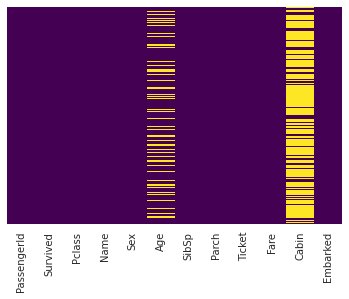

In [67]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [68]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

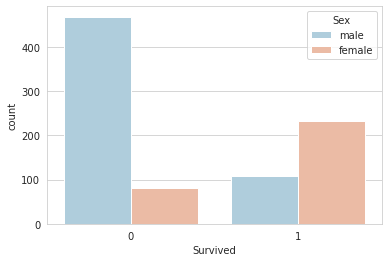

In [69]:
sns.countplot(x= 'Survived',hue='Sex',  data = df, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

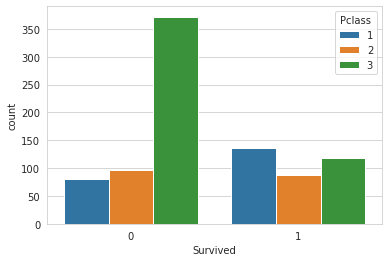

In [70]:
sns.countplot(x= 'Survived',hue='Pclass',  data = df)

/home/bipro/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

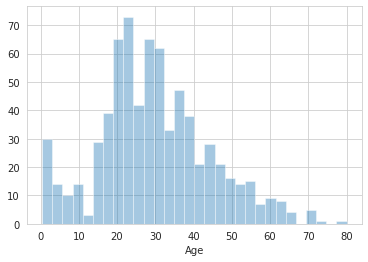

In [71]:
sns.distplot(df['Age'].dropna(), kde = False, bins = 30 )

<AxesSubplot:ylabel='Frequency'>

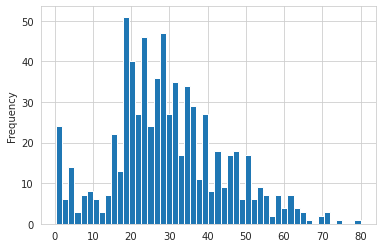

In [72]:
df['Age'].plot.hist(bins = 50)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

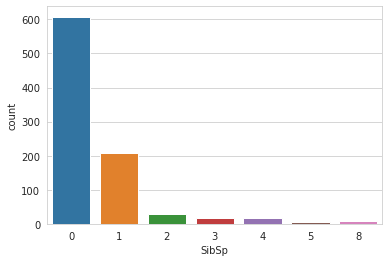

In [74]:
sns.countplot(x = 'SibSp', data = df)

<AxesSubplot:>

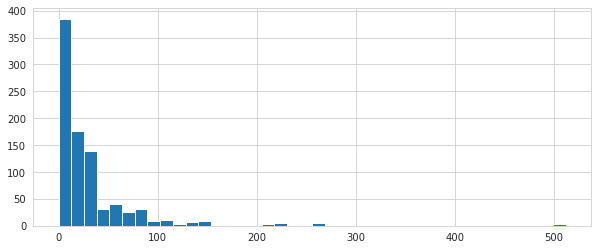

In [75]:
df['Fare'].hist(bins = 40, figsize=(10,4))

In [76]:
import cufflinks as cf

In [77]:
cf.go_offline()

In [78]:
df['Fare'].iplot(kind = 'hist', bins = 50)

# cleaning our data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

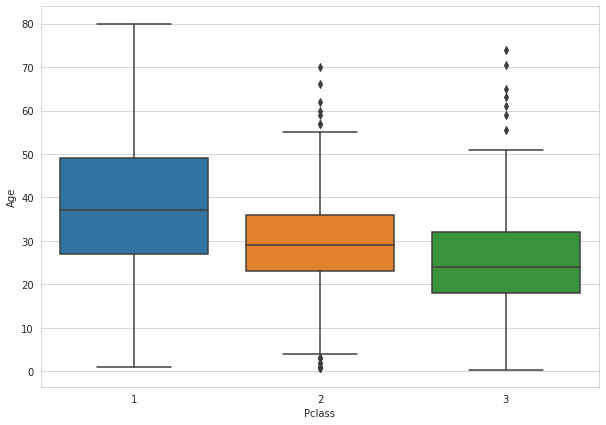

In [79]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [80]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [81]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1 )

<AxesSubplot:>

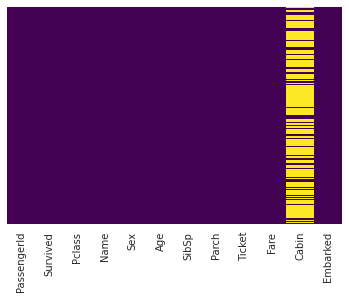

In [82]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap = 'viridis')

In [83]:
df.drop('Cabin', axis = 1, inplace = True)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

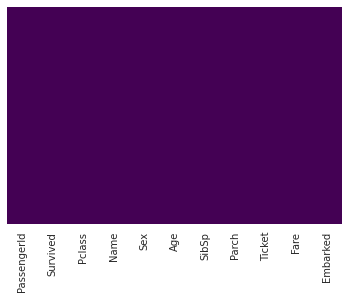

In [85]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap = 'viridis')

deal with categorical column by creating a dummy variable

In [86]:
sex = pd.get_dummies(df['Sex'], drop_first = True)

In [87]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [88]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [89]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [90]:
df = pd.concat([df, sex, embark], axis = 1)

In [91]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [92]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace=True)

In [93]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [94]:
df.drop('PassengerId', axis = 1, inplace = True)

In [95]:
df.head(100)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
95,0,3,24.0,0,0,8.0500,1,0,1
96,0,1,71.0,0,0,34.6542,1,0,0
97,1,1,23.0,0,1,63.3583,1,0,0
98,1,2,34.0,0,1,23.0000,0,0,1


In [101]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [102]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logmodel = LogisticRegression()

In [113]:
logmodel.fit(X_train, y_train)

/home/bipro/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [114]:
predictions = logmodel.predict(X_test)

# Evaluate the model

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]])